In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Employee_attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [51]:
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel 

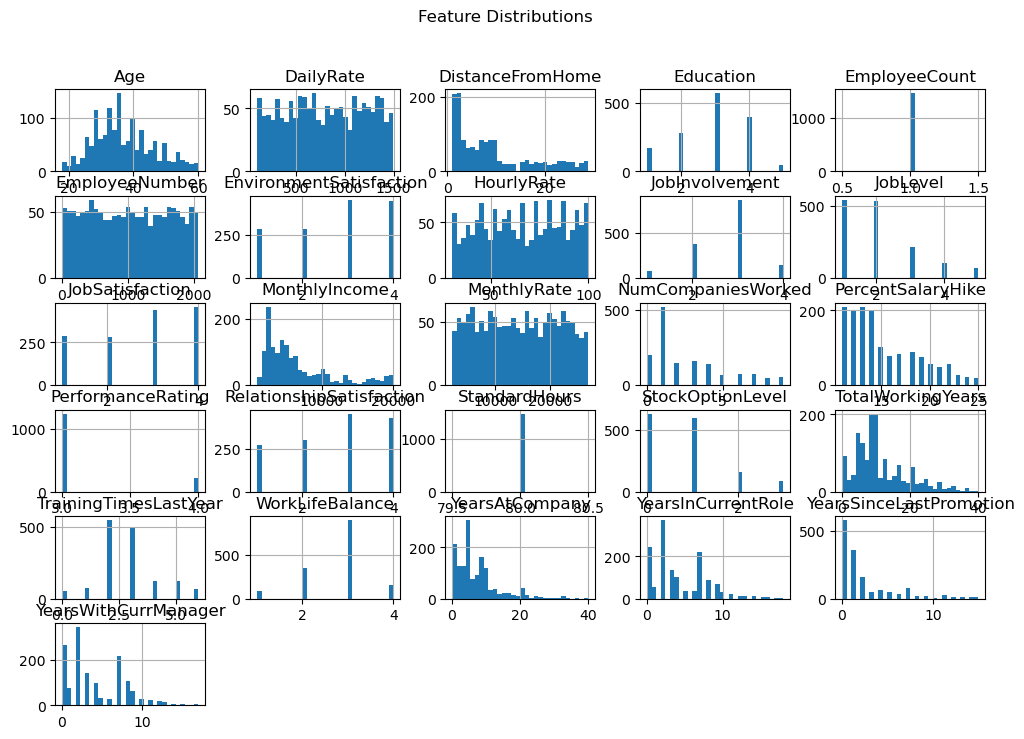

In [38]:
# Univariate Analysis - Histograms
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions")
plt.show()





0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object
0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

🔹 Logistic Regression Results
Accuracy: 0.8605442176870748
Confusion Matrix:
 [[237  10]
 [ 31  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294


🔹 Random Forest Results
Accuracy: 0.8333333333333334
Confusion Matrix:
 [[240   7]
 [ 42   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.

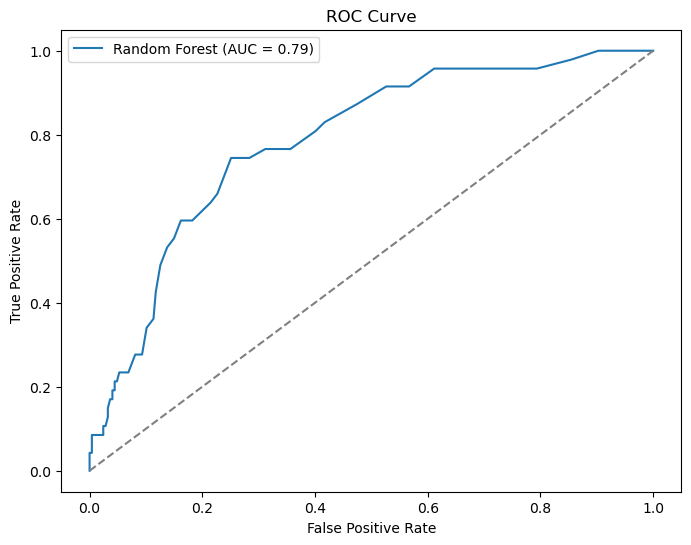

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


# Drop unnecessary columns
drop_cols = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]  # Not useful for prediction
df.drop(columns=drop_cols, inplace=True, errors='ignore')
print(df.Attrition)
# Convert 'Attrition' (target variable) to binary
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Encode categorical variables
cat_cols = df.select_dtypes(include=["object"]).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Split data into train & test
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


param_grid = {
    "n_estimators": [100, 300, 500],  
    "max_depth": [None, 10, 20],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "class_weight": ["balanced"]  # Handle imbalance
}

rf_tuned = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_tuned, param_grid, cv=5, scoring="recall", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_


# Evaluation
print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

print("\n🔹 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC Curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
print(best_rf)


🔹 Top 10 Important Features
MonthlyIncome                        0.086430
Age                                  0.066802
TotalWorkingYears                    0.057894
YearsAtCompany                       0.054390
OverTime_Yes                         0.054241
YearsWithCurrManager                 0.050730
DailyRate                            0.049079
DistanceFromHome                     0.045670
MonthlyRate                          0.039733
HourlyRate                           0.036884
StockOptionLevel                     0.035633
NumCompaniesWorked                   0.035543
PercentSalaryHike                    0.031980
JobLevel                             0.031676
YearsInCurrentRole                   0.030169
EnvironmentSatisfaction              0.029117
JobSatisfaction                      0.022106
MaritalStatus_Single                 0.021626
YearsSinceLastPromotion              0.020115
JobInvolvement                       0.018931
RelationshipSatisfaction             0.018582
WorkL

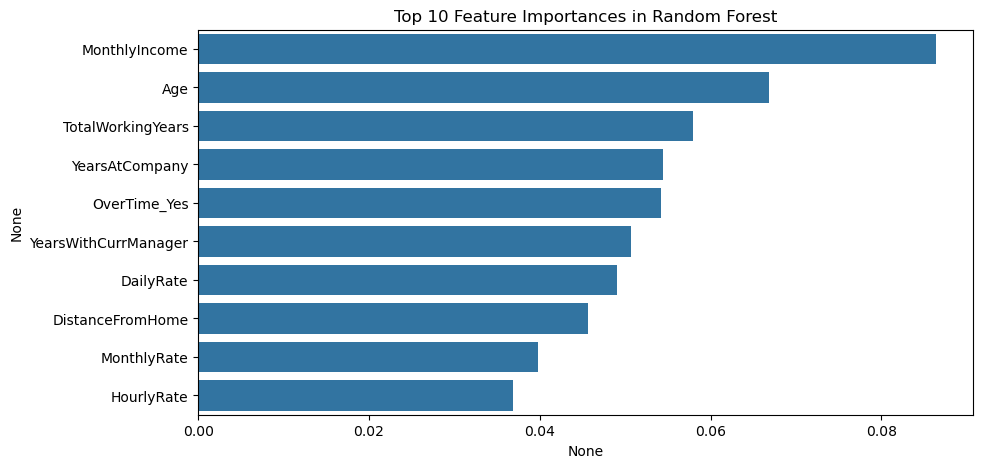

In [57]:
importances = best_rf.feature_importances_
important_features = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("\n🔹 Top 10 Important Features")
print(important_features.head(80))

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=important_features[:10], y=important_features.index[:10])
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()


In [59]:
drop_cols = [
    "EducationField_Other", "JobRole_Human Resources", "PerformanceRating", "JobRole_Manager",
    "JobRole_Sales Representative", "EducationField_Technical Degree", "EducationField_Marketing",
    "EducationField_Medical"
]

X_train_reduced = X_train.drop(columns=drop_cols)
X_test_reduced = X_test.drop(columns=drop_cols)

rf_tuned = RandomForestClassifier(
    class_weight={0: 1, 1: 4},  # Increase weight for class 1 (attrition)
    max_depth=12,               
    min_samples_split=5,        
    min_samples_leaf=2,         
    n_estimators=500,           
    random_state=42
)

rf_tuned.fit(X_train_reduced, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test_reduced)

print("\n🔹 Adjusted Random Forest Performance")
print(classification_report(y_test, y_pred_rf_tuned))




🔹 Adjusted Random Forest Performance
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       247
           1       0.36      0.11      0.16        47

    accuracy                           0.83       294
   macro avg       0.60      0.53      0.53       294
weighted avg       0.77      0.83      0.79       294




🔹 Random Forest Performance
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.43      0.45      0.44        47

    accuracy                           0.82       294
   macro avg       0.66      0.67      0.66       294
weighted avg       0.82      0.82      0.82       294


🔹 Random Forest with Lowered Threshold (0.3)
              precision    recall  f1-score   support

           0       0.93      0.66      0.77       247
           1       0.29      0.72      0.41        47

    accuracy                           0.67       294
   macro avg       0.61      0.69      0.59       294
weighted avg       0.82      0.67      0.71       294


🔹 XGBoost Performance
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.45      0.40      0.43        47

    accuracy                           0.83       294
   macro avg       0.67      0

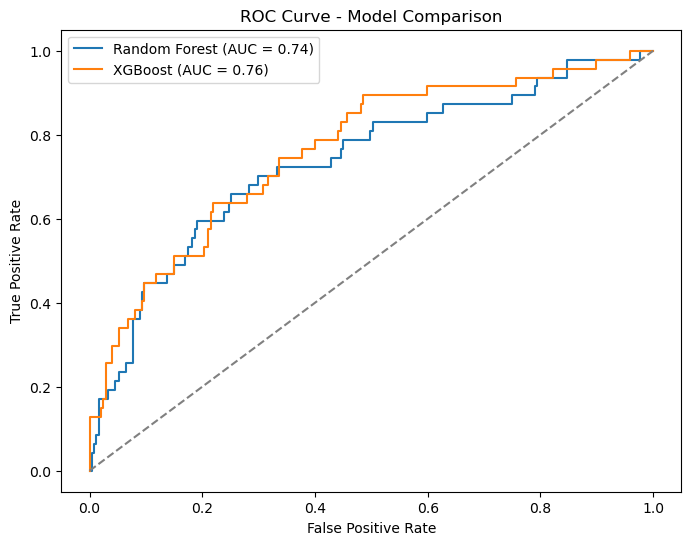

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load Data
file_path = "Employee_attrition.csv"  # Change to your dataset path
df = pd.read_csv(file_path)

# Drop unnecessary columns
drop_cols = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]
df.drop(columns=drop_cols, inplace=True)

# Convert 'Attrition' (target variable) to binary
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Remove low-importance features
drop_low_importance = [
    "EducationField_Other", "JobRole_Human Resources", "PerformanceRating", "JobRole_Manager",
    "JobRole_Sales Representative", "EducationField_Technical Degree", "EducationField_Marketing",
    "EducationField_Medical"
]
df.drop(columns=[col for col in drop_low_importance if col in df.columns], inplace=True)

# Split data into train & test
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# 🚀 **Random Forest with Class Weight Adjustment**
rf_model = RandomForestClassifier(
    class_weight={0: 1, 1: 4},  # Increase weight for attrition cases
    max_depth=12, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    n_estimators=500, 
    random_state=42
)
rf_model.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
print("\n🔹 Random Forest Performance")
print(classification_report(y_test, y_pred_rf))

# Lower prediction threshold for better recall
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
y_pred_rf_adjusted = (y_pred_prob_rf >= 0.3).astype(int)

print("\n🔹 Random Forest with Lowered Threshold (0.3)")
print(classification_report(y_test, y_pred_rf_adjusted))

# 🚀 **XGBoost Model for Comparison**
xgb_model = XGBClassifier(
    scale_pos_weight=4,  # Adjusts for class imbalance
    max_depth=10, 
    learning_rate=0.05,  
    n_estimators=500, 
    colsample_bytree=0.8, 
    subsample=0.8,        
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("\n🔹 XGBoost Performance")
print(classification_report(y_test, y_pred_xgb))

# 🚀 **ROC Curve for Comparison**
plt.figure(figsize=(8, 6))
for model, y_pred_prob, label in zip(
    [rf_model, xgb_model], 
    [y_pred_prob_rf, xgb_model.predict_proba(X_test_scaled)[:, 1]], 
    ["Random Forest", "XGBoost"]
):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Model Comparison")
plt.legend()
plt.show()


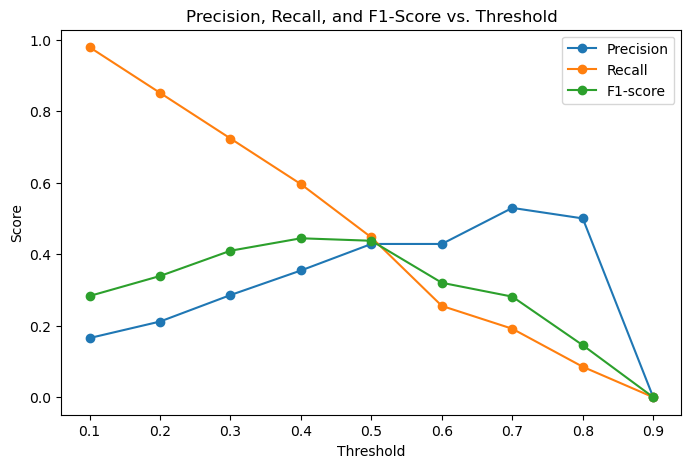


🔹 Best Threshold Found: 0.40

🔹 XGBoost (Optimized) Performance
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       247
           1       0.47      0.40      0.44        47

    accuracy                           0.83       294
   macro avg       0.68      0.66      0.67       294
weighted avg       0.82      0.83      0.83       294


🔹 Weighted Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       247
           1       0.45      0.49      0.47        47

    accuracy                           0.82       294
   macro avg       0.68      0.69      0.68       294
weighted avg       0.83      0.82      0.83       294


🔹 Final Random Forest Performance (Using Best Threshold)
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       247
           1       0.35      0.60      0.44        47

    accuracy   

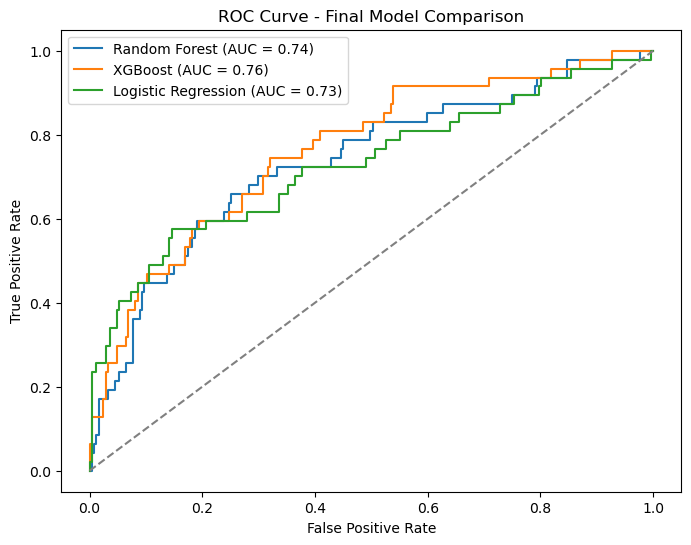

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression

# 🚀 **1️⃣ Find the Best Threshold**
def find_best_threshold(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0.1, 0.9, 9)  # Test multiple thresholds
    results = []

    for t in thresholds:
        y_pred_adjusted = (y_probs >= t).astype(int)
        report = classification_report(y_test, y_pred_adjusted, output_dict=True)
        recall = report["1"]["recall"]
        precision = report["1"]["precision"]
        f1 = report["1"]["f1-score"]
        results.append((t, precision, recall, f1))

    results = np.array(results)
    
    # Plot Threshold vs. Recall & Precision
    plt.figure(figsize=(8, 5))
    plt.plot(results[:, 0], results[:, 1], label="Precision", marker="o")
    plt.plot(results[:, 0], results[:, 2], label="Recall", marker="o")
    plt.plot(results[:, 0], results[:, 3], label="F1-score", marker="o")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision, Recall, and F1-Score vs. Threshold")
    plt.legend()
    plt.show()

    # Return best threshold (where F1-score is highest)
    best_threshold = results[np.argmax(results[:, 3]), 0]
    print(f"\n🔹 Best Threshold Found: {best_threshold:.2f}")
    return best_threshold

best_threshold_rf = find_best_threshold(rf_model, X_test_scaled, y_test)

# 🚀 **2️⃣ Train XGBoost with Better Class Balancing**
xgb_optimized = XGBClassifier(
    scale_pos_weight=5,  # Increased weight for attrition cases
    max_depth=10, 
    learning_rate=0.03,  # Slower learning rate for better generalization
    n_estimators=600,  # More boosting rounds
    colsample_bytree=0.8, 
    subsample=0.8,        
    random_state=42
)

xgb_optimized.fit(X_train_scaled, y_train_smote)
y_pred_xgb_opt = xgb_optimized.predict(X_test_scaled)

print("\n🔹 XGBoost (Optimized) Performance")
print(classification_report(y_test, y_pred_xgb_opt))

# 🚀 **3️⃣ Train a Weighted Logistic Regression**
log_reg = LogisticRegression(class_weight="balanced", solver="liblinear")
log_reg.fit(X_train_scaled, y_train_smote)
y_pred_log = log_reg.predict(X_test_scaled)

print("\n🔹 Weighted Logistic Regression Performance")
print(classification_report(y_test, y_pred_log))

# 🚀 **4️⃣ Final Model Comparison with Best Threshold**
y_pred_rf_final = (rf_model.predict_proba(X_test_scaled)[:, 1] >= best_threshold_rf).astype(int)
print("\n🔹 Final Random Forest Performance (Using Best Threshold)")
print(classification_report(y_test, y_pred_rf_final))

# 🚀 **5️⃣ Plot Final ROC Curves**
plt.figure(figsize=(8, 6))
for model, label in zip(
    [rf_model, xgb_optimized, log_reg], 
    ["Random Forest", "XGBoost", "Logistic Regression"]
):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Final Model Comparison")
plt.legend()
plt.show()


In [66]:
log_reg_tuned = LogisticRegression(class_weight={0: 1, 1: 5}, solver="liblinear")
log_reg_tuned.fit(X_train_scaled, y_train_smote)
y_pred_log_tuned = log_reg_tuned.predict(X_test_scaled)

print("\n🔹 Tuned Weighted Logistic Regression Performance")
print(classification_report(y_test, y_pred_log_tuned))



🔹 Tuned Weighted Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       247
           1       0.26      0.68      0.38        47

    accuracy                           0.64       294
   macro avg       0.59      0.66      0.56       294
weighted avg       0.81      0.64      0.69       294



Lost a lot of accuracy so we will adjust weights again

In [68]:
log_reg_tuned = LogisticRegression(class_weight={0: 1, 1: 3}, solver="liblinear")
log_reg_tuned.fit(X_train_scaled, y_train_smote)
y_pred_log_tuned = log_reg_tuned.predict(X_test_scaled)

print("\n🔹 Tuned Weighted Logistic Regression Performance")
print(classification_report(y_test, y_pred_log_tuned))


🔹 Tuned Weighted Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.90      0.71      0.80       247
           1       0.28      0.60      0.38        47

    accuracy                           0.69       294
   macro avg       0.59      0.65      0.59       294
weighted avg       0.80      0.69      0.73       294



At the end of the day we may want to create a programm to keep these people in the company. If this increases happiness at a certain level of cost for now we will assume a higher recall is more important since we want to catch as many true positives as possible

In [74]:
y_pred_prob_gb = xgb_model.predict_proba(X_test_scaled)[:, 1]  # Get probability of attrition (class 1)
y_pred_gb_adjusted = (y_pred_prob_gb >= 0.35).astype(int)  # Change threshold from 0.5 to 0.35

# Evaluate Model with New Threshold
print("\n🔹 Gradient Boosting with Lowered Threshold (0.35)")
print(classification_report(y_test, y_pred_gb_adjusted))



🔹 Gradient Boosting with Lowered Threshold (0.35)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.44      0.45      0.44        47

    accuracy                           0.82       294
   macro avg       0.67      0.67      0.67       294
weighted avg       0.82      0.82      0.82       294



 ### Gradient boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
gb_model.fit(X_train_scaled, y_train_smote)
y_pred_gb = gb_model.predict(X_test_scaled)

print("\n🔹 Gradient Boosting Performance")
print(classification_report(y_test, y_pred_gb))


🔹 Gradient Boosting Performance
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       247
           1       0.52      0.32      0.39        47

    accuracy                           0.84       294
   macro avg       0.70      0.63      0.65       294
weighted avg       0.82      0.84      0.83       294



In [78]:
from sklearn.metrics import classification_report

# Get probability of attrition (Class 1)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Lower threshold from 0.5 to 0.35
threshold = 0.35
y_pred_gb_adjusted = (y_pred_prob_gb >= threshold).astype(int)

# Evaluate new predictions
print(f"\n🔹 Gradient Boosting with Lowered Threshold ({threshold})")
print(classification_report(y_test, y_pred_gb_adjusted))



🔹 Gradient Boosting with Lowered Threshold (0.35)
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       247
           1       0.49      0.36      0.41        47

    accuracy                           0.84       294
   macro avg       0.68      0.64      0.66       294
weighted avg       0.82      0.84      0.83       294



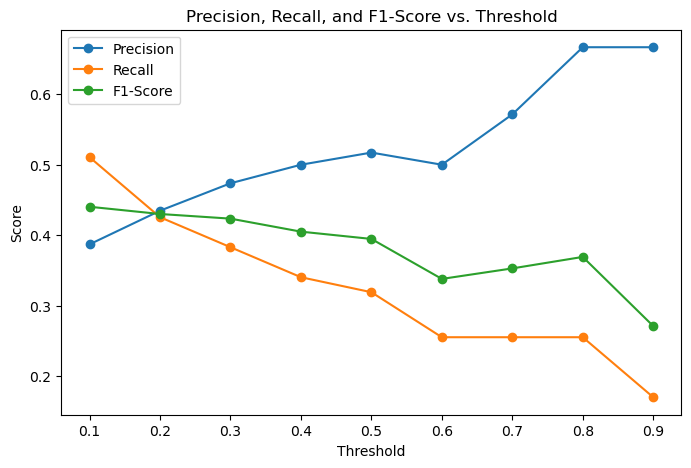

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define threshold range
thresholds = np.linspace(0.1, 0.9, 9)

precisions, recalls, f1_scores = [], [], []

for t in thresholds:
    y_pred_adj = (y_pred_prob_gb >= t).astype(int)
    report = classification_report(y_test, y_pred_adj, output_dict=True)
    precisions.append(report["1"]["precision"])
    recalls.append(report["1"]["recall"])
    f1_scores.append(report["1"]["f1-score"])

# Plot Precision-Recall tradeoff
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions, marker="o", label="Precision")
plt.plot(thresholds, recalls, marker="o", label="Recall")
plt.plot(thresholds, f1_scores, marker="o", label="F1-Score")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score vs. Threshold")
plt.legend()
plt.show()


In [84]:
# Set the optimized threshold
optimal_threshold = 0.22  # Adjusted from 0.5 to 0.25

# Get predicted probabilities
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Apply new threshold
y_pred_gb_final = (y_pred_prob_gb >= optimal_threshold).astype(int)

# Evaluate final Gradient Boosting performance
from sklearn.metrics import classification_report

print(f"\n🔹 Gradient Boosting with Optimized Threshold ({optimal_threshold})")
print(classification_report(y_test, y_pred_gb_final))



🔹 Gradient Boosting with Optimized Threshold (0.22)
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.43      0.43      0.43        47

    accuracy                           0.82       294
   macro avg       0.66      0.66      0.66       294
weighted avg       0.82      0.82      0.82       294



This is the best model so far but we will look at xgb model next and see if result get even better

### xgb model

In [87]:
from xgboost import XGBClassifier

xgb_tuned = XGBClassifier(
    scale_pos_weight=6,  # Increased weight for attrition class
    max_depth=7, 
    learning_rate=0.03, 
    n_estimators=700,  
    colsample_bytree=0.8, 
    subsample=0.8,        
    random_state=42
)

xgb_tuned.fit(X_train_scaled, y_train_smote)
y_pred_xgb_tuned = xgb_tuned.predict(X_test_scaled)

print("\n🔹 Tuned XGBoost Performance")
print(classification_report(y_test, y_pred_xgb_tuned))



🔹 Tuned XGBoost Performance
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       247
           1       0.45      0.43      0.44        47

    accuracy                           0.83       294
   macro avg       0.67      0.66      0.67       294
weighted avg       0.82      0.83      0.82       294



In [92]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=700, depth=6, learning_rate=0.03, random_state=42, verbose=0)
cat_model.fit(X_train_scaled, y_train_smote)
y_pred_cat = cat_model.predict(X_test_scaled)

print("\n🔹 CatBoost Performance")
print(classification_report(y_test, y_pred_cat))



🔹 CatBoost Performance
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       247
           1       0.50      0.36      0.42        47

    accuracy                           0.84       294
   macro avg       0.69      0.65      0.66       294
weighted avg       0.82      0.84      0.83       294



In [95]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(n_estimators=700, learning_rate=0.03, max_depth=7, class_weight="balanced", random_state=42)
lgbm_model.fit(X_train_scaled, y_train_smote)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print("\n🔹 LightGBM Performance")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 986, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1157
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

poly_log_reg = make_pipeline(
    PolynomialFeatures(degree=2),  # Add non-linear interactions
    LogisticRegression(class_weight="balanced", solver="liblinear")
)
poly_log_reg.fit(X_train_scaled, y_train_smote)
y_pred_poly_log = poly_log_reg.predict(X_test_scaled)

print("\n🔹 Polynomial Logistic Regression Performance")
print(classification_report(y_test, y_pred_poly_log))



🔹 Polynomial Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       247
           1       0.37      0.47      0.42        47

    accuracy                           0.79       294
   macro avg       0.63      0.66      0.64       294
weighted avg       0.81      0.79      0.80       294



In [99]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", solver="adam", max_iter=500, random_state=42)
mlp_model.fit(X_train_scaled, y_train_smote)
y_pred_mlp = mlp_model.predict(X_test_scaled)

print("\n🔹 Neural Network Performance")
print(classification_report(y_test, y_pred_mlp))



🔹 Neural Network Performance
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       247
           1       0.40      0.40      0.40        47

    accuracy                           0.81       294
   macro avg       0.65      0.65      0.65       294
weighted avg       0.81      0.81      0.81       294



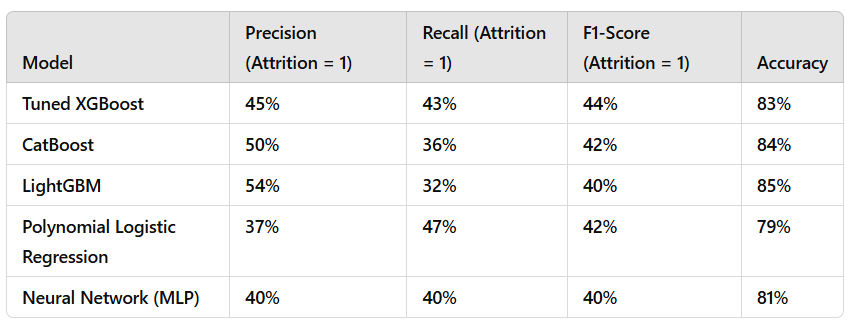

The polynomial model is looking best

In [103]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define pipeline
poly = PolynomialFeatures()  # Degree will be set in GridSearch
log_reg = LogisticRegression(solver="liblinear", max_iter=500)

pipeline = make_pipeline(poly, log_reg)

# Define hyperparameter grid
param_grid = {
    "polynomialfeatures__degree": [2, 3],  # Try quadratic and cubic terms
    "logisticregression__C": [0.1, 1, 10],  # Regularization strength
    "logisticregression__class_weight": [{0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]  # Adjusting for class imbalance
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, scoring="f1", cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_smote)

# Best model from tuning
best_poly_model = grid_search.best_estimator_

# Predict on test data
y_pred_poly_tuned = best_poly_model.predict(X_test_scaled)

# Evaluate the tuned model
from sklearn.metrics import classification_report

print("\n🔹 Best Polynomial Logistic Regression Model")
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly_tuned))



OSError: [WinError 1450] Insufficient system resources exist to complete the requested service